# ТЕМА 2. 

Событийно-ориентированное программирование.

## Лекция. 
Взаимодействие элементов посредством сигналов/слотов 

### Учебные вопросы

1. Понятие сигналов и слотов
2. Диалоговые окна

## Источники

* Официальная документация: https://doc.qt.io/qtforpython/tutorials/basictutorial/signals_and_slots.html

* Прохоренок Н. А., Дронов В. А. Python 3 и PyQt 5. Разработка приложений. 2019 г. 

## Понятие событийно-ориентированного программирования.

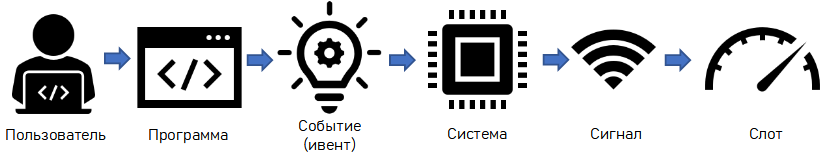


**Сигналы** - это уведомления, отправляемые виджетами, когда "что-то" происходит. Этим "что-то" может быть практически любое событие изменения состояния виджета (от нажатия кнопки до изменения текста поля ввода или изменения текста окна). 

Многие сигналы инициируются действиями пользователя, **но это не является правилом**.



Вы также можете создавать свои собственные пользовательские сигналы, которые мы рассмотрим позже.


**Слоты** - это имя, которое Qt использует для приемников сигналов. В Python любая функция (или метод) в вашем приложении может быть использована в качестве слота - просто подключив к нему сигнал. 

Если сигнал отправляет данные, то принимающая функция тоже получит эти данные. 

Многие виджеты Qt также имеют свои собственные встроенные слоты, что означает, что вы можете напрямую подключать виджеты Qt друг к другу.

Соединение сигнала со слотом:

> Для обработки сигнала необходимо: 

> Указать сигнал, который хотим обработать (clicked, triggered, textChanged)

>Назначить сигналу обработчик (слот) с помощью метода connect()

```python
from PySide6 import QtWidgets



class Window(QtWidgets.QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)

        self.initUi()
        self.initSignals()

    def initUi(self) -> None:
        """
        Доинициализация Ui

        :return: None
        """

        self.pushButton = QtWidgets.QPushButton("Выполнить что-то")

        layout = QtWidgets.QVBoxLayout()
        layout.addWidget(self.pushButton)

        self.setLayout(layout)

    def initSignals(self) -> None:
        """
        Инициализация сигналов

        :return: None
        """

        # Указываем, что при нажатии на кнопку, 
        # будут выполнены дествия описанные 
        # в методе класса onPushButtonClicked
        self.pushButton.clicked.connect(self.onPushButtonClicked)  

    def onPushButtonClicked(self):
        print("pushButton was clicked")


if __name__ == "__main__":
    app = QtWidgets.QApplication()

    window = Window()
    window.show()

    app.exec()

```

* Обработчиком можно назначить:
    * Функцию;
    * Метод класса (слот);
    * Экземпляр класса, в котором определен метод __call__();
    * Анонимную функцию;


Слот вызывается когда вырабатывается сигнал, с которым он связан. 


Слот это обычная функция в python и может вызываться обычным способом; единственная его особенность, что с ним можно соединять сигналы.


Для того, чтобы функцию сделать слотом, необходимо указать для этой функции декоратор @Slot. 

> Примечание: данное действие не обязательно, но желательно, т.к. функция на которую ссылается сигнал, автоматически является слотом, однако при указании декоратора  вызов слота будет выполняться быстрее чем метода